In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv('HR_comma_sep.csv')

In [2]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df['left'].value_counts() ## here 3571 has left the job and rest are retaining

0    11428
1     3571
Name: left, dtype: int64

In [4]:
data = df.groupby('left')

data.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


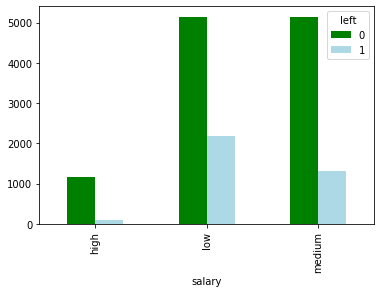

In [5]:
###Impact of salary on employee retention


pd.crosstab(df.salary,df.left).plot(kind='bar',color =['green','lightblue']);

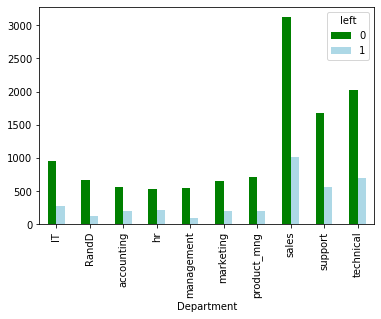

In [6]:
####Department wise employee retention rate

pd.crosstab(df.Department,df.left).plot(kind='bar',color =['green','lightblue'])

In [7]:
data= df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
data

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [8]:
#creating dummy variables for salary attribute

dummy = pd.get_dummies(df['salary'],prefix='salary')
dummy.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [9]:
data = data.drop(columns='salary')

In [10]:
data = pd.concat([data,dummy],axis=1)
data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x=data
y=df.left
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.9)

In [13]:
x_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
891,0.75,237,0,1,0,0
14242,0.45,134,0,0,1,0
111,0.09,289,0,1,0,0
13397,0.80,224,1,0,0,1
13499,0.69,174,0,0,0,1
...,...,...,...,...,...,...
2491,1.00,144,0,0,1,0
1411,0.32,280,0,0,1,0
14031,0.74,262,0,0,1,0
10211,0.92,230,0,1,0,0


In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
model.fit(x_train,y_train)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
yp = model.predict(x_test)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
model.predict_proba(x_test)

array([[0.9639973 , 0.0360027 ],
       [0.6588652 , 0.3411348 ],
       [0.70831509, 0.29168491],
       ...,
       [0.80001838, 0.19998162],
       [0.98000174, 0.01999826],
       [0.78758544, 0.21241456]])

In [18]:
## Accuracy of the model

model.score(x_test,y_test)

0.7879259259259259